<a href="https://colab.research.google.com/github/DataAnalystSergio/Bank-marketing-prediction-ml/blob/main/TP1/EJERCICIO_CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRUPO XX:
* SERGIO ARMIJO CARRILLO

## Bank Marketing

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa.
Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requerían más de un contacto con el mismo cliente para determinar si el producto (depósito a plazo fijo) sería suscrito o no.

Se tiene el conjunto de datos:
- bank-full.csv con todos los ejemplos, ordenados por fecha (desde mayo de 2008 hasta noviembre de 2010).
El objetivo de clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (variable y).
- Número de instancias: 45211 para bank-full.csv (4521 para bank.csv).
- Número de atributos: 16 + el atributo de salida.

##### Variables:
- age : edad (numérica)
- job : tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "gerencia", "empleada doméstica", "emprendedor", "estudiante", "obrero", "autónomo", "jubilado", "técnico", "servicios")
- marital : estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" incluye divorciado o viudo)
- education : educación (categórico: "desconocido", "secundaria", "primaria", "terciaria")
- default : morosidad ¿tiene crédito en mora? (binario: "sí", "no")
- balance: saldo promedio anual, en euros (numérico)
- housing : préstamo vivienda ¿tiene préstamo hipotecario? (binario: "sí", "no")
- loan : préstamo personal ¿tiene préstamo personal? (binario: "sí", "no")
- contact: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
- day: último día de contacto del mes (numérico)
- month: último mes de contacto del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")
- duration: duración del último contacto, en segundos (numérico)
- campaign: número de contactos realizados durante esta campaña para este cliente (numérico, incluye el último contacto)
- pdays: número de días que han pasado desde el último contacto con el cliente en una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
- previous: contactos anteriores - número de contactos realizados antes de esta campaña para este cliente (numérico)
- poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fallo", "éxito")

##### Variable de salida (objetivo deseado):
- y - ¿El cliente ha suscrito un depósito a plazo fijo? (binario: "sí", "no")

## Por Desarrollar:

* Realizar un análisis descriptivo inicial de todas las variables (numéricas y categóricas), observando distribuciones, medidas de tendencia central y dispersión.
* Visualizar la distribución de la variable objetivo (suscripción del depósito - y) para identificar posibles desequilibrios de clases.
* Analizar la correlación entre las variables numéricas utilizando una matriz de correlación y visualización de un heatmap.
* Realizar un análisis de correlaciones categóricas con la variable objetivo utilizando tablas de contingencia y gráficos de barras.
* Explorar la interacción entre las variables categóricas y numéricas utilizando gráficos de caja, violin o de dispersión.
* Verificar la existencia de valores atípicos o outliers en las variables numéricas y cómo podrían afectar los modelos.
* Evaluar si existen valores faltantes o inconsistencias en los datos, y proponer técnicas de imputación o eliminación si es necesario.
* Aplicar técnicas de preprocesamiento como escalado de variables numéricas y codificación de variables categóricas (por ejemplo, one-hot encoding o label encoding).
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Implementar un modelo de regresión logística como base inicial para la clasificación, incluyendo métricas como precisión, recall, F1-score, y matriz de confusión.
* Probar algoritmos de clasificación más complejos como árboles de decisión, random forest, extrem gradient boosting (XGBoost), LightGBM, y máquinas de soporte vectorial (SVM), comparando sus rendimientos.
* Realizar un análisis de la importancia de las variables para los modelos de árboles (por ejemplo, random forest) y gradient boosting.
* Comparar el rendimiento de los diferentes algoritmos utilizando las métricas clave y graficar las curvas ROC y AUC.
* Realizar tuning de hiperparámetros para mejorar el rendimiento de los modelos más prometedores utilizando grid search o random search.
* Finalmente, seleccionar el mejor modelo basado en su rendimiento y explicar los resultados obtenidos, incluyendo posibles interpretaciones y limitaciones del modelo.

#### Opcional:
* Implementar técnicas de balanceo de clases (como SMOTE o undersampling) si el dataset está desequilibrado en la variable objetivo.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos el dataset bank.csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PAE SERGY/CLASES/7 Y 8/2_CLASIFICACION/data/bank.csv', sep=';')

In [ ]:
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

**1. Análisis descriptivo inicial de todas las variables (numéricas y categóricas), distribuciones, medidas de tendencia central y dispersión**

In [ ]:
df.shape

(4521, 17)

Nuestro dataset está conformado por 4521 registros x 17 columnas.

In [ ]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN



**Análisis de variables numéricas:**

- **Edad:** La distribución está relativamente **centrada** con una **media de 41 años**, la **mayoría** de clientes entre **33 y 49 años.**

- **Saldo promedio anual:** El balance promedio anual de los clientes es de **1422.65€**, con un alto nivel de variabilidad de **3009.68€** en promedio.

- **Último día de contacto:** En promedio los clientes han sido contactado como último dia los **16** del mes, con una distribución aparentemente **cercana** a los días **16** (9 - 21 día).

- **Duración:** En promedio las llamadas han durado **4.4** minutos, con una variabilidad moderada, centrada entre **1.4 min y 5.4 min**.

- **Numero de contactos realizados durante esta campaña para este cliente:** En promedio el numero de contactos ha sido de **2.7** veces, con una variable alta, distribuida relativamente centrada entre **1 y 3** veces.

- **Número de días que han pasado desde el último contacto con el cliente en una campaña anterior:** El **75%** de los clientes no ha sido contactado anteriormente para una campaña o no hay información del cliente.

- **Número de contactos realizados antes de esta campaña para este cliente:** Más del **50%** de los clientes no ha sido contactado para esta campaña actual.

**Análisis de variables categorícas:**

- **Trabajo:** El trabajo con mayor **frecuencia** es la **administración** con un participación del **21.43%** del total de clientes.

- **Estado Civil:** La mayoría de clientes son **casados**, representando el **61.87%**.

- **Nivel Educativo:** La mayoría frecuenta un nivel educativo de **secundaria** del **51%**.

- **Morosidad:** El **98.3%** de los clientes **no** presentan **morosidad** con el banco, esto puede indicar que los clientes son puntuales con sus pagos.

- **Crédito Hipotecario:** Más del **56%** de nuestros clientes tiene un crédito hipotecario.

- **Crédito personal:** Más del **84%**  No tiene un préstamo personal con el banco.

- **Tipo de comunicación:** La mayoría de clientes han sido contactado por medio del **celular**, representando el **64%.**

- **Último mes de contacto:** La mayoría de clientes han sido contactado por última vez en **mayo**, representando el **31%**.

- **Resultado de la campaña anterior:** **unknown% es la categoría dominante con **82.0%**, lo que indica una gran cantidad de datos faltantes/no registrados sobre las campañas previas.

- **Suscripción a un plazo fijo:** Más del **88%** de los clientes **no se suscribió** a un plazo fijo.

**2. Distribución de la variable objetivo (suscripción del depósito - y) para identificar posibles desequilibrios de clases**

/tmp/ipython-input-284686637.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette='viridis')


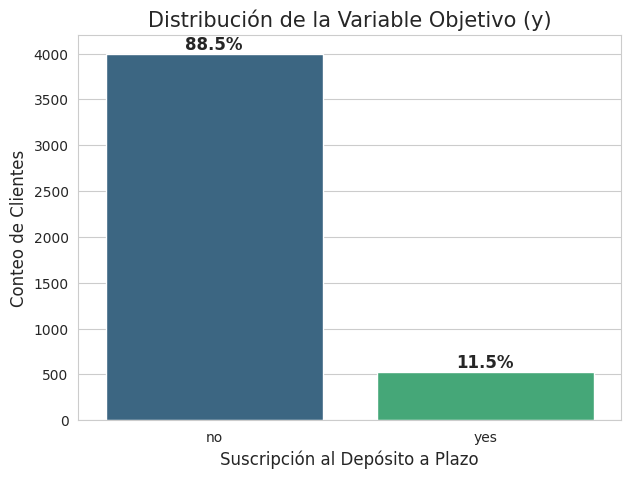


Conteo de Clases en 'y':
y
no     4000
yes     521
Name: count, dtype: int64

Proporción de Clases:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Configuración para mejor visualización
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

# 2. Creación del Gráfico de Barras
# Usamos sns.countplot() para contar las ocurrencias de cada categoría en 'y'.
ax = sns.countplot(x='y', data=df, palette='viridis')

# 3. Añadir Título y Etiquetas
plt.title('Distribución de la Variable Objetivo (y)', fontsize=15)
plt.xlabel('Suscripción al Depósito a Plazo', fontsize=12)
plt.ylabel('Conteo de Clientes', fontsize=12)

# 4. Añadir la proporción (porcentaje) encima de cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    # Calcular el porcentaje y formatearlo
    percentage = f'{100 * height / total:.1f}%'
    # Posicionar el texto encima de la barra
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 50, # Pequeño desplazamiento vertical
            percentage,
            ha='center',
            fontsize=12,
            fontweight='bold')

# 5. Mostrar el Gráfico
plt.show()

# Opcional: Mostramos el conteo exacto en la consola
print("\nConteo de Clases en 'y':")
print(df['y'].value_counts())
print("\nProporción de Clases:")
print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Observamos que existe un desequilibrio de clases significativo (clase desbalanceada):

- La clase mayoritaria (negativa) es 'no' (no suscripción), representando casi el 89% de los datos.

- La clase minoritaria (positiva) es 'yes' (suscripción), representando solo alrededor del 11% de los datos.

**3. Correlación entre las variables numéricas** (Matriz de correlacion y heatmap)

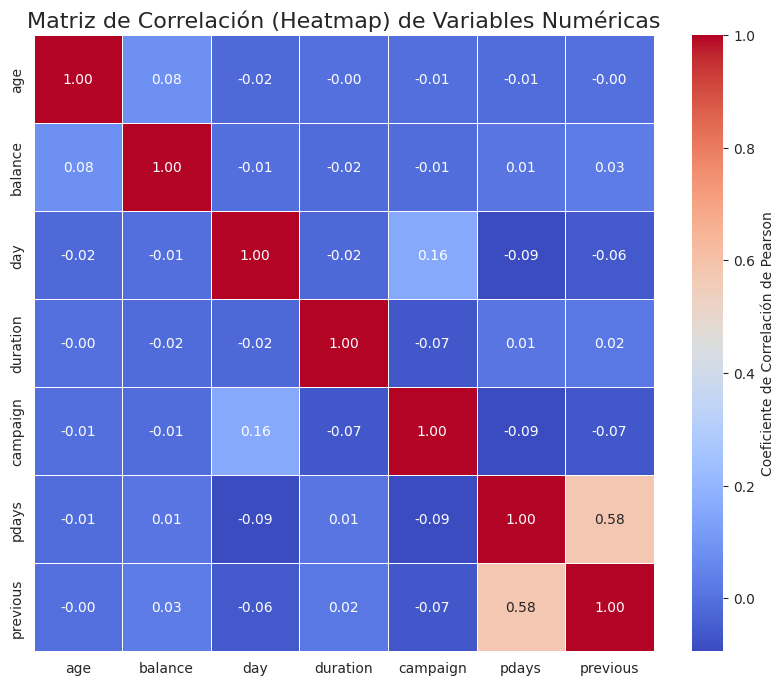

Matriz de Correlación:
           age  balance   day  duration  campaign  pdays  previous
age       1.00     0.08 -0.02     -0.00     -0.01  -0.01     -0.00
balance   0.08     1.00 -0.01     -0.02     -0.01   0.01      0.03
day      -0.02    -0.01  1.00     -0.02      0.16  -0.09     -0.06
duration -0.00    -0.02 -0.02      1.00     -0.07   0.01      0.02
campaign -0.01    -0.01  0.16     -0.07      1.00  -0.09     -0.07
pdays    -0.01     0.01 -0.09      0.01     -0.09   1.00      0.58
previous -0.00     0.03 -0.06      0.02     -0.07   0.58      1.00


In [ ]:
# 1. Seleccionar solo las variables numéricas
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_numeric = df[numeric_cols]

# 2. Calcular la Matriz de Correlación
correlation_matrix = df_numeric.corr()

# 3. Visualización del Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Mostrar los valores de correlación en el mapa
    cmap='coolwarm',     # Esquema de color: 'coolwarm' va de azul (negativo) a rojo (positivo)
    fmt=".2f",           # Formato de los números con dos decimales
    linewidths=.5,       # Líneas para separar las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)
plt.title('Matriz de Correlación (Heatmap) de Variables Numéricas', fontsize=16)
plt.show()

# 4. Mostrar la matriz de correlación en la consola (Opcional)
print("Matriz de Correlación:")
print(correlation_matrix.round(2))

**Conclusión:**

En general, las correlaciones entre las variables numéricas son bajas.

La única relación moderada es entre pdays y previous (0.58), lo cual es esperable ya que ambas variables están relacionadas con el historial de contacto del cliente.

La baja multicolinealidad entre estas características numéricas es una buena noticia, por motivo que reduce la necesidad de utilizar técnicas de reducción de dimensionalidad.

**4. Análisis de correlaciones categóricas con la variable objetivo utilizando tablas de contingencia y gráficos de barras**


--- Análisis de la variable: job ---

Tabla de Frecuencias Absolutas:
y               no  yes
job                    
admin.         420   58
blue-collar    877   69
entrepreneur   153   15
housemaid       98   14
management     838  131
retired        176   54
self-employed  163   20
services       379   38
student         65   19
technician     685   83
unemployed     115   13
unknown         31    7

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y                 no    yes
job                        
retired        76.52  23.48
student        77.38  22.62
unknown        81.58  18.42
management     86.48  13.52
housemaid      87.50  12.50
admin.         87.87  12.13
self-employed  89.07  10.93
technician     89.19  10.81
unemployed     89.84  10.16
services       90.89   9.11
entrepreneur   91.07   8.93
blue-collar    92.71   7.29


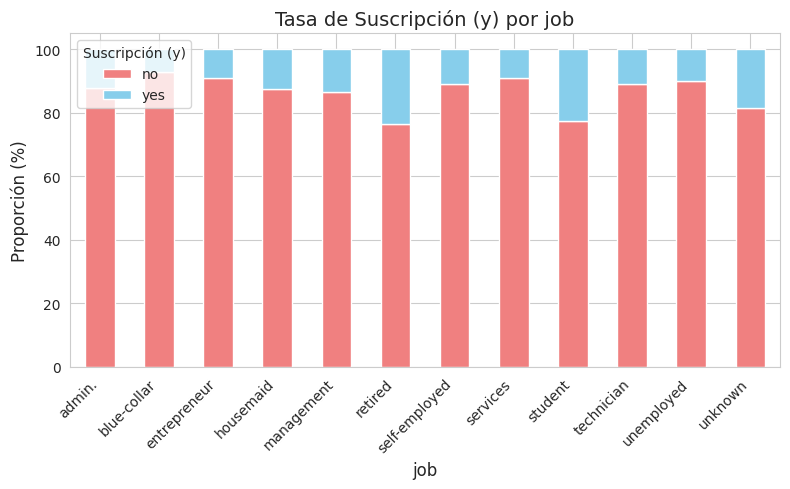


--- Análisis de la variable: marital ---

Tabla de Frecuencias Absolutas:
y           no  yes
marital            
divorced   451   77
married   2520  277
single    1029  167

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y            no    yes
marital               
divorced  85.42  14.58
single    86.04  13.96
married   90.10   9.90


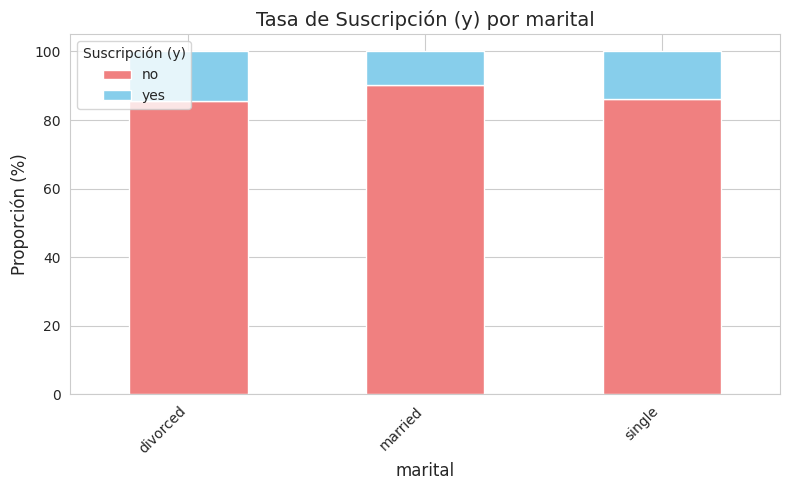


--- Análisis de la variable: education ---

Tabla de Frecuencias Absolutas:
y            no  yes
education           
primary     614   64
secondary  2061  245
tertiary   1157  193
unknown     168   19

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y             no    yes
education              
tertiary   85.70  14.30
secondary  89.38  10.62
unknown    89.84  10.16
primary    90.56   9.44


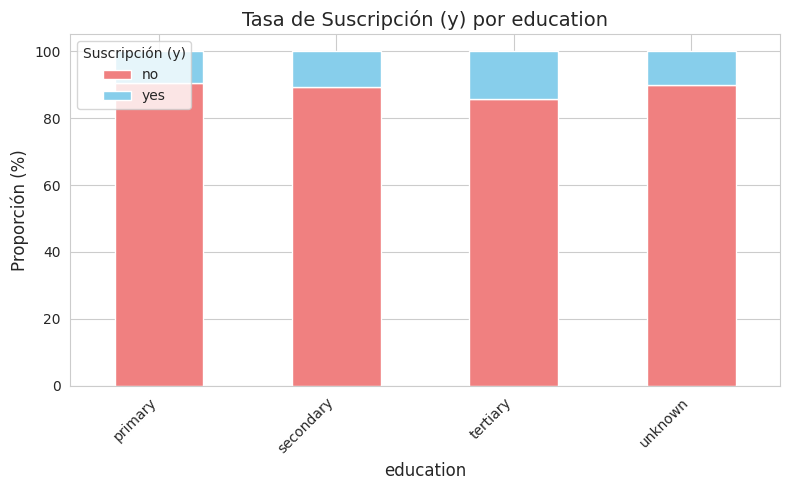


--- Análisis de la variable: month ---

Tabla de Frecuencias Absolutas:
y        no  yes
month           
apr     237   56
aug     554   79
dec      11    9
feb     184   38
jan     132   16
jul     645   61
jun     476   55
mar      28   21
may    1305   93
nov     350   39
oct      43   37
sep      35   17

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y         no    yes
month              
oct    53.75  46.25
dec    55.00  45.00
mar    57.14  42.86
sep    67.31  32.69
apr    80.89  19.11
feb    82.88  17.12
aug    87.52  12.48
jan    89.19  10.81
jun    89.64  10.36
nov    89.97  10.03
jul    91.36   8.64
may    93.35   6.65


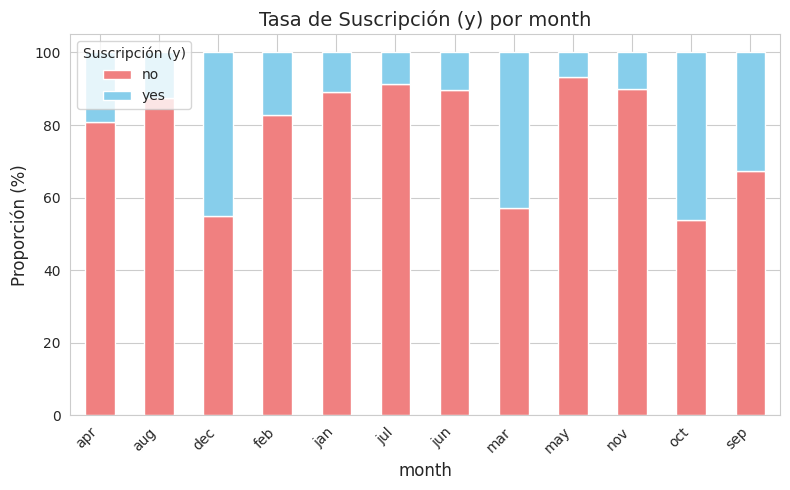


--- Análisis de la variable: default ---

Tabla de Frecuencias Absolutas:
y          no  yes
default           
no       3933  512
yes        67    9

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y           no    yes
default              
yes      88.16  11.84
no       88.48  11.52


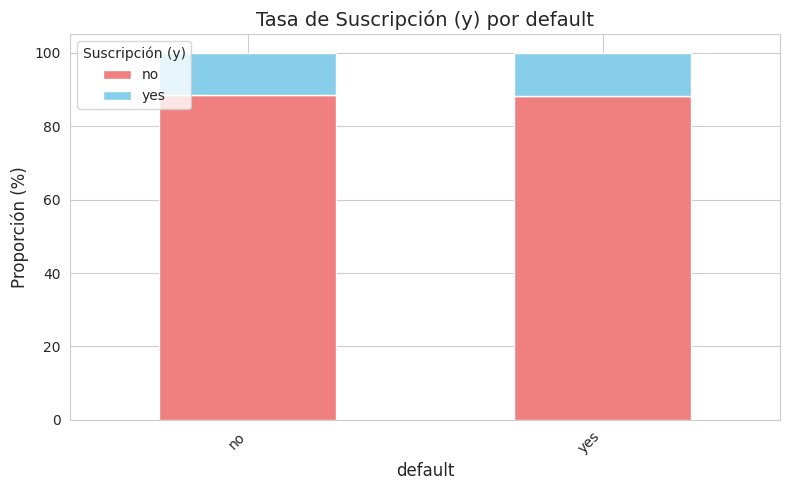


--- Análisis de la variable: housing ---

Tabla de Frecuencias Absolutas:
y          no  yes
housing           
no       1661  301
yes      2339  220

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y           no    yes
housing              
no       84.66  15.34
yes      91.40   8.60


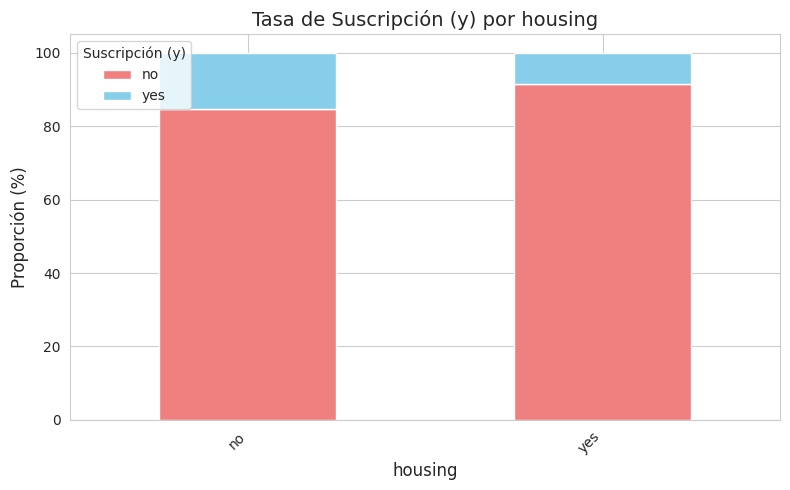


--- Análisis de la variable: loan ---

Tabla de Frecuencias Absolutas:
y       no  yes
loan           
no    3352  478
yes    648   43

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y        no    yes
loan              
no    87.52  12.48
yes   93.78   6.22


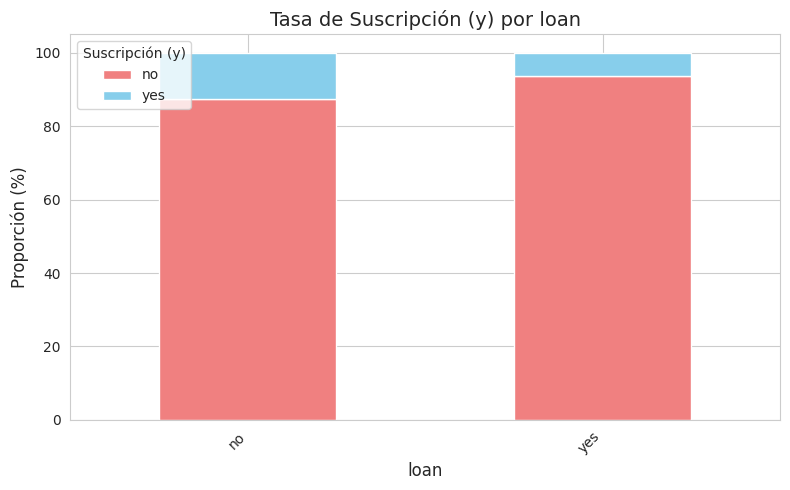


--- Análisis de la variable: contact ---

Tabla de Frecuencias Absolutas:
y            no  yes
contact             
cellular   2480  416
telephone   257   44
unknown    1263   61

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y             no    yes
contact                
telephone  85.38  14.62
cellular   85.64  14.36
unknown    95.39   4.61


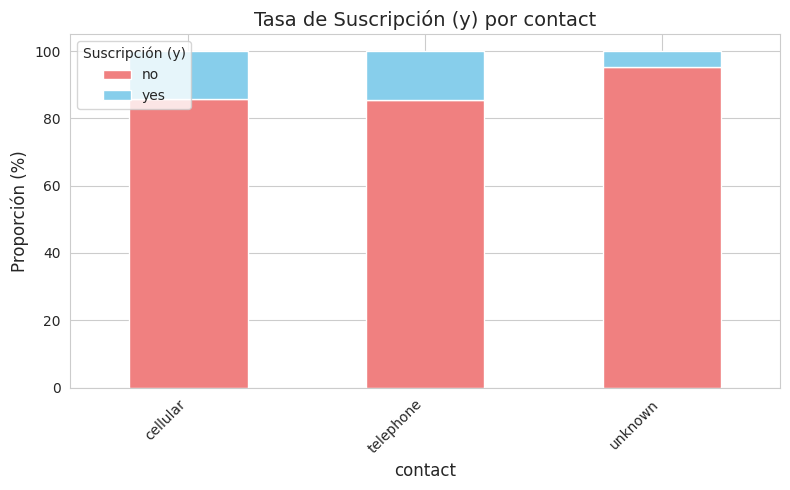


--- Análisis de la variable: poutcome ---

Tabla de Frecuencias Absolutas:
y           no  yes
poutcome           
failure    427   63
other      159   38
success     46   83
unknown   3368  337

Tabla de Proporciones (Tasa de Suscripción por Categoría) en %:
y            no    yes
poutcome              
success   35.66  64.34
other     80.71  19.29
failure   87.14  12.86
unknown   90.90   9.10


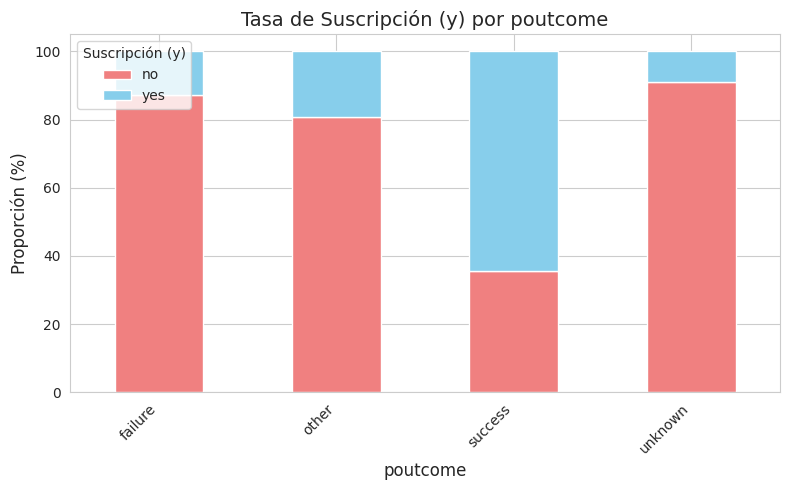

In [ ]:


# Variables Categóricas a analizar
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
target_col = 'y'

def analyze_categorical_vs_target(data, cat_col, target_col):
    """Calcula la tabla de contingencia y genera un gráfico de barras apiladas."""

    print(f"\n--- Análisis de la variable: {cat_col} ---")

    # A. Tabla de Contingencia (Frecuencias Absolutas)
    contingency_table = pd.crosstab(data[cat_col], data[target_col])
    print("\nTabla de Frecuencias Absolutas:")
    print(contingency_table)

    # B. Tabla de Proporciones por Fila (Tasa de Suscripción)
    # Normalizamos por fila para ver el porcentaje de 'yes' dentro de cada categoría.
    prop_table = pd.crosstab(data[cat_col], data[target_col], normalize='index').mul(100).round(2)
    print("\nTabla de Proporciones (Tasa de Suscripción por Categoría) en %:")
    print(prop_table.sort_values(by='yes', ascending=False)) # Ordenar por tasa de éxito

    # C. Visualización (Gráfico de Barras Apiladas Normalizado)
    prop_table[['no', 'yes']].plot(kind='bar', stacked=True, figsize=(8, 5), color=['lightcoral', 'skyblue'])
    plt.title(f'Tasa de Suscripción (y) por {cat_col}', fontsize=14)
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel('Proporción (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Suscripción (y)', loc='upper left')
    plt.tight_layout()
    plt.show()

# Ejecutar el análisis para las variables
for col in ['job', 'marital', 'education', 'month', 'default', 'housing', 'loan', 'contact', 'poutcome']:
    analyze_categorical_vs_target(df, col, target_col)

In [ ]:

from scipy.stats import chi2_contingency

# 1. Carga de datos
chi2_results = []

print("--- Selección de Variables Categóricas (Prueba Chi-cuadrado) ---")

for cat_col in categorical_cols:
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[cat_col], df[target_col])

    # Aplicar la prueba Chi-cuadrado
    # statistic: valor del estadístico Chi-cuadrado
    # p: valor p
    # dof: grados de libertad
    # expected: frecuencias esperadas
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Determinar si es significativo (usando un umbral estricto de 0.01)
    is_significant = p_value < 0.01

    chi2_results.append({
        'Variable': cat_col,
        'Chi2_Stat': f'{chi2:.2f}',
        'p_value': f'{p_value:.5f}',
        'Seleccionar': 'Sí' if is_significant else 'No'
    })

# Mostrar resultados
results_df = pd.DataFrame(chi2_results).sort_values(by='p_value')
print(results_df.to_markdown(index=False))

--- Selección de Variables Categóricas (Prueba Chi-cuadrado) ---
| Variable   |   Chi2_Stat |   p_value | Seleccionar   |
|:-----------|------------:|----------:|:--------------|
| job        |       68.99 |   0       | Sí            |
| housing    |       48.88 |   0       | Sí            |
| loan       |       21.87 |   0       | Sí            |
| contact    |       87.87 |   0       | Sí            |
| month      |      250.5  |   0       | Sí            |
| poutcome   |      386.88 |   0       | Sí            |
| marital    |       19.03 |   7e-05   | Sí            |
| education  |       15.24 |   0.00163 | Sí            |
| default    |        0    |   1       | No            |


**1. Variables de Mayor Éxito (Alto Potencial de Conversión)**

**Job:** Los **"retired y "student"** reflejan un alto valor de suscripción con **23 y 22%** respectivamente.

**Marital:** Los **divorced** y **married** representan el **14%** c/u de suscripción.

**Education:** El nivel educativo **tertiary** refleja un **14%** de suscripción.

**Month:** Los meses **octubre, diciembre, marzo, setiembre y abril** presenta alto nivel de suscripción con **46, 45, 42, 32 y 19%** respectivamente.

**Housing:** Las personas que **no tengan** un credito Hipotecario se subcribieron con un **15%.**

**Poutcome:** Las personas que participaron de una **campaña anterior** se suscripbieron con un **65%.**

**2. Variables de Menor Éxito (Bajo Potencial de Conversión)**

Las variables **Default:11%**, **Loan:12%** y **Contact:14%** reflejan un valor bajo de suscripción.

**Conclusión:**

Este análisis indica que para las campañas futuras, deben priorizar contactar a los clientes en los meses octubre, diciembre y marzo, enfocandose con un nivel educativo tertiary, retired y student, divorced y single, que no tengan un credito Hipotecario y que hayan participado en campañas previas.

**5. Interacción entre las variables categóricas y numéricas, con gráficos de caja, violin o de dispersión**

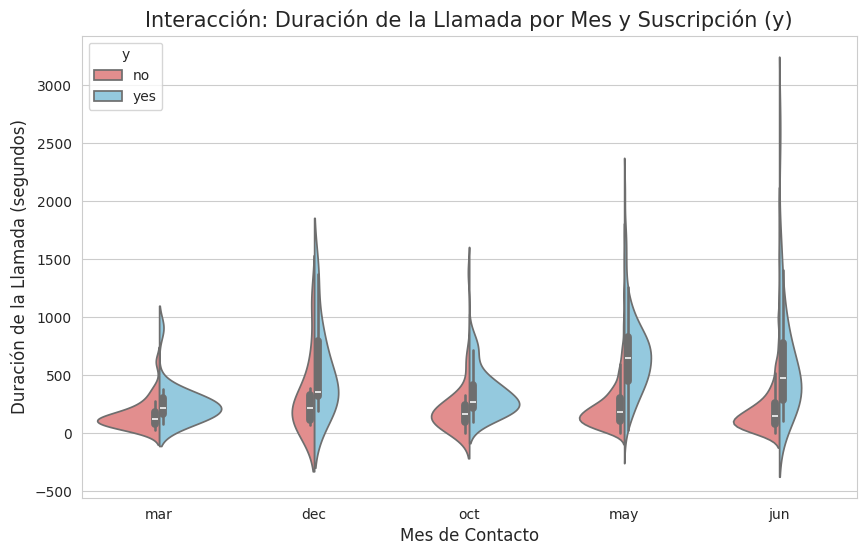

/tmp/ipython-input-1192679573.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job', y='balance', data=df, order=job_order, palette='viridis')


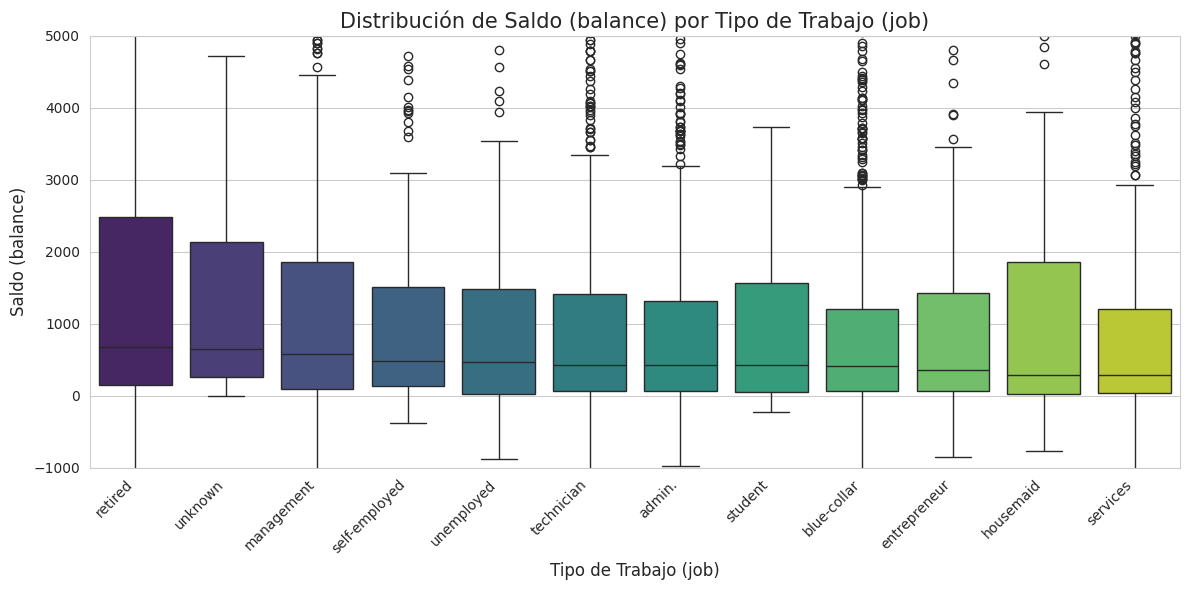

/tmp/ipython-input-1192679573.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='poutcome', y='duration', data=df, palette='Set2')


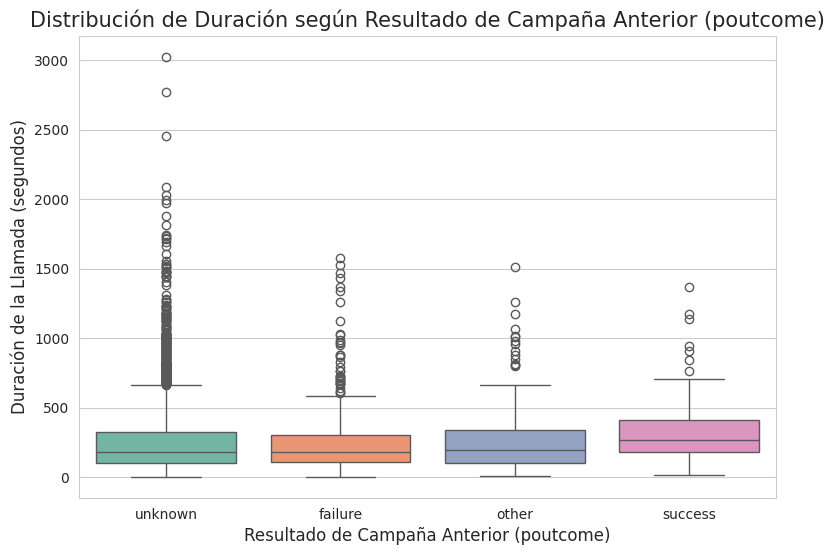

In [ ]:

# 1. Análisis de Interacción Clave: month vs. duration (segmentado por y)
# Solo para los meses más extremos (altos y bajos)
months_of_interest = ['mar', 'dec', 'oct', 'may', 'jun']
df_month_subset = df[df['month'].isin(months_of_interest)]

plt.figure(figsize=(10, 6))
# Gráfico de violín para ver la densidad de la distribución de 'duration'
sns.violinplot(x='month', y='duration', hue='y', data=df_month_subset,
               order=months_of_interest, split=True, palette={'yes': 'skyblue', 'no': 'lightcoral'})
plt.title('Interacción: Duración de la Llamada por Mes y Suscripción (y)', fontsize=15)
plt.xlabel('Mes de Contacto', fontsize=12)
plt.ylabel('Duración de la Llamada (segundos)', fontsize=12)
plt.show()

# 2. Análisis de Interacción Económica: job vs. balance
# Limitamos el eje Y para una mejor visualización del cuerpo principal de los datos (excluir outliers extremos)
plt.figure(figsize=(12, 6))
job_order = df.groupby('job')['balance'].median().sort_values(ascending=False).index # Ordenar por la mediana
sns.boxplot(x='job', y='balance', data=df, order=job_order, palette='viridis')
plt.title('Distribución de Saldo (balance) por Tipo de Trabajo (job)', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(-1000, 5000) # Límite para enfocarse en la mayoría de los datos
plt.xlabel('Tipo de Trabajo (job)', fontsize=12)
plt.ylabel('Saldo (balance)', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Análisis de Interacción de Historial: poutcome vs. duration
plt.figure(figsize=(9, 6))
sns.boxplot(x='poutcome', y='duration', data=df, palette='Set2')
plt.title('Distribución de Duración según Resultado de Campaña Anterior (poutcome)', fontsize=15)
plt.xlabel('Resultado de Campaña Anterior (poutcome)', fontsize=12)
plt.ylabel('Duración de la Llamada (segundos)', fontsize=12)
plt.show()

**6. Verificar la existencia de valores atípicos o outliers en las variables numéricas y cómo podrían afectar los modelos**

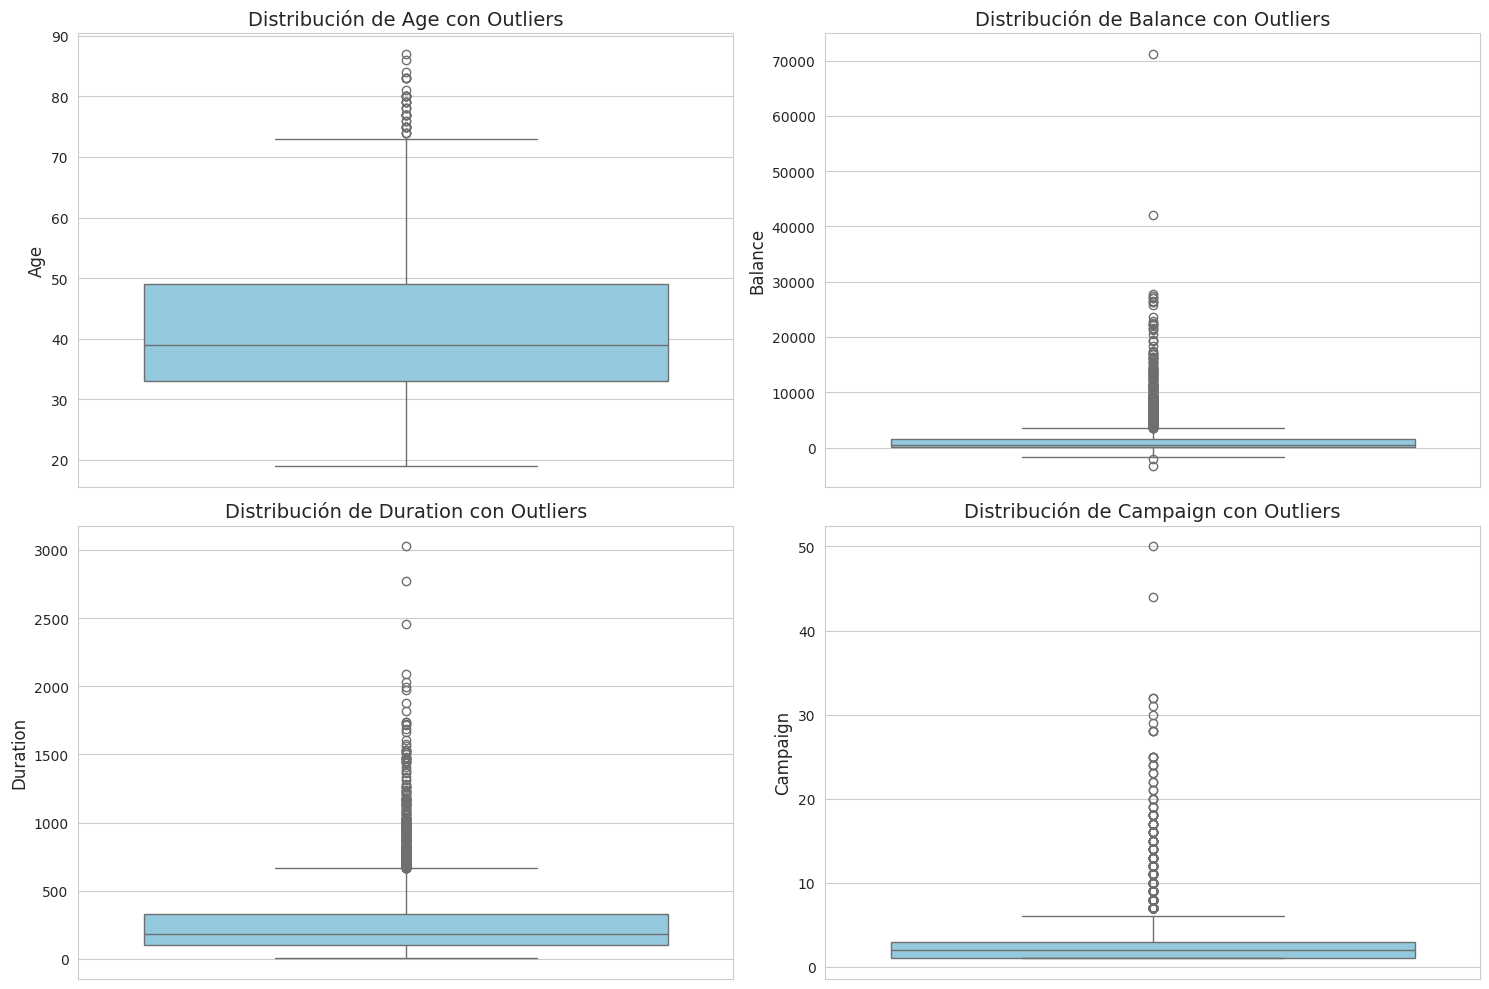


--- Cuantificación de Outliers (Método IQR) ---
| Variable   |   Total Outliers | Porcentaje (%)   |   Límite Superior IQR |
|:-----------|-----------------:|:-----------------|----------------------:|
| Age        |               38 | 0.84%            |                  73   |
| Balance    |              506 | 11.19%           |                3596.5 |
| Duration   |              330 | 7.30%            |                 666.5 |
| Campaign   |              318 | 7.03%            |                   6   |


In [ ]:

# Variables Numéricas Clave
numeric_cols = ['age', 'balance', 'duration', 'campaign']

# Configuración del estilo de visualización
sns.set_style("whitegrid")

# --- 1. Visualización: Gráficos de Caja (Box Plots) ---
# Usamos box plots para identificar visualmente los outliers (puntos fuera de los bigotes)
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1) # Crea una cuadrícula 2x2
    # El box plot muestra la mediana (línea central), los cuartiles y los outliers como puntos
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Distribución de {col.capitalize()} con Outliers', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

# --- 2. Cuantificación: Cálculo de Outliers por IQR ---
print("\n--- Cuantificación de Outliers (Método IQR) ---")
outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites para Outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Porcentaje de outliers
    outlier_count = len(outliers)
    total_count = len(df)
    outlier_percentage = (outlier_count / total_count) * 100

    # Crear una fila para el resumen
    outlier_summary.append({
        'Variable': col.capitalize(),
        'Total Outliers': outlier_count,
        'Porcentaje (%)': f'{outlier_percentage:.2f}%',
        'Límite Superior IQR': f'{upper_bound:.2f}'
    })

# Mostrar el resumen en formato de tabla
summary_df = pd.DataFrame(outlier_summary)
print(summary_df.to_markdown(index=False))

**7. Evaluar si existen valores faltantes o inconsistencias en los datos, y proponer técnicas de imputación o eliminación si es necesario**

In [ ]:
# Verificamos las variables que presentan inconsistencia

# Lista de columnas a verificar y sus códigos especiales asociados
# 'pdays' usa el valor -1 para "no aplicable"
# Las variables categóricas usan 'unknown'
implicit_missing_data = {
    'pdays': -1,
    'poutcome': 'unknown',
    'contact': 'unknown',
    'job': 'unknown',
    'education': 'unknown'
}

total_rows = len(df)
summary = []

print("--- Búsqueda de Valores Implícitos/Códigos Especiales ---")
print(f"Total de Filas en el Dataset: {total_rows}")

# 2. Iterar sobre las columnas y sus códigos
for col, code in implicit_missing_data.items():
    # Contar las ocurrencias del código especial
    count = (df[col] == code).sum()

    # Calcular el porcentaje
    percentage = (count / total_rows) * 100

    # Añadir a la lista de resumen
    summary.append({
        'Variable': col,
        'Código Especial': code,
        'Conteo': count,
        'Porcentaje (%)': f'{percentage:.2f}%'
    })

# 3. Mostrar los resultados
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by='Conteo', ascending=False)

print("\nResumen de Inconsistencias (Valores 'Faltantes' Implícitos):")
print(summary_df.to_markdown(index=False))

print("\nAnálisis:")
print("Las variables 'pdays' y 'poutcome' comparten el mismo número de valores desconocidos (82.00%).")
print("Esto confirma que la mayoría de los clientes en esta muestra no fueron contactados en campañas anteriores.")
print("Las inconsistencias en 'contact' (29.30%) también son significativas.")

--- Búsqueda de Valores Implícitos/Códigos Especiales ---
Total de Filas en el Dataset: 4521

Resumen de Inconsistencias (Valores 'Faltantes' Implícitos):
| Variable   | Código Especial   |   Conteo | Porcentaje (%)   |
|:-----------|:------------------|---------:|:-----------------|
| pdays      | -1                |     3705 | 81.95%           |
| poutcome   | unknown           |     3705 | 81.95%           |
| contact    | unknown           |     1324 | 29.29%           |
| education  | unknown           |      187 | 4.14%            |
| job        | unknown           |       38 | 0.84%            |

Análisis:
Las variables 'pdays' y 'poutcome' comparten el mismo número de valores desconocidos (82.00%).
Esto confirma que la mayoría de los clientes en esta muestra no fueron contactados en campañas anteriores.
Las inconsistencias en 'contact' (29.30%) también son significativas.


In [ ]:
# Transformamos la variable numérica "pdays" en categorica

# Variable original: pdays (número de días desde el último contacto de la campaña anterior)
# Código especial: -1 significa que el cliente NUNCA fue contactado antes.

# --- 2. Creación de la Nueva Variable Binaria: had_previous_contact ---

# Lógica:
# Si pdays es igual a -1, significa que NO hubo contacto previo (asigna 0).
# Si pdays es MAYOR a -1 (es decir, 0 o cualquier número positivo),
# significa que SÍ hubo contacto previo (asigna 1).

df['had_previous_contact'] = np.where(
    df['pdays'] > 0,  # Condición: ¿pdays es positivo (hubo contacto)?
    1,                # Valor si la condición es VERDADERA (Yes)
    0                 # Valor si la condición es FALSA (No o -1)
)

# Nota: Usamos pdays > 0 en lugar de pdays != -1 para ser más estrictos,
# aunque en este dataset pdays=0 no existe. pdays > -1 también funcionaría
# si el 0 es un valor válido. La condición df['pdays'] != -1 es la más directa
# para separar el código especial, pero usaremos > 0 para capturar el historial real.

# --- 3. Eliminación de la Variable Original ---
df = df.drop('pdays', axis=1, errors= 'ignore')

# --- 4. Verificación del Resultado ---

print("--- Verificación del Nuevo Feature 'had_previous_contact' ---")

# Mostrar las primeras filas con las columnas relevantes para verificar
print(df[['had_previous_contact']].head(10).to_markdown(index=False))

print("\nConteo de Valores en la Nueva Variable:")
print(df['had_previous_contact'].value_counts().to_markdown())

# Verificación de la proporción (debe coincidir con el 82% vs 18% del análisis previo)
contact_percentage = df['had_previous_contact'].value_counts(normalize=True).mul(100).round(2)
print("\nPorcentaje de Clientes con Historial:")
print(contact_percentage.to_markdown())

--- Verificación del Nuevo Feature 'had_previous_contact' ---
|   had_previous_contact |
|-----------------------:|
|                      0 |
|                      1 |
|                      1 |
|                      0 |
|                      0 |
|                      1 |
|                      1 |
|                      0 |
|                      0 |
|                      1 |

Conteo de Valores en la Nueva Variable:
|   had_previous_contact |   count |
|-----------------------:|--------:|
|                      0 |    3705 |
|                      1 |     816 |

Porcentaje de Clientes con Historial:
|   had_previous_contact |   proportion |
|-----------------------:|-------------:|
|                      0 |        81.95 |
|                      1 |        18.05 |


In [ ]:
# Tratamiento de la variable 'poutcome' bajo la técnica One-Hot Encoding (OHE)

cat_variable = 'poutcome'
print(f"Iniciando OHE para {cat_variable}...")

# --- 2. Aplicación de One-Hot Encoding ---

# Generar todas las columnas binarias (incluyendo la redundante)
poutcome_dummies = pd.get_dummies(df[cat_variable],
                                   prefix=cat_variable,
                                   drop_first=False) # Genera: failure, other, success, unknown

# --- 3. Eliminar la Columna Redundante para evitar Multicolinealidad ---

# Elegimos eliminar 'poutcome_other' (o 'poutcome_failure') para mantener 'unknown' explícito.
column_to_drop = 'poutcome_other'
print(f"Eliminando la columna redundante: {column_to_drop}")

# Aplicar la eliminación
poutcome_dummies = poutcome_dummies.drop(column_to_drop, axis=1)


# --- 4. Unir las nuevas columnas al DataFrame y limpiar la original ---

# Eliminar la columna original (Contiene texto)
df = df.drop(cat_variable, axis=1)

# Unir las nuevas columnas codificadas (Ahora solo 3 columnas binarias)
df = pd.concat([df, poutcome_dummies], axis=1)

# --- 5. Verificación del Resultado ---

print(f"\n--- Codificación de '{cat_variable}' sin Multicolinealidad ---")
print("Columnas binarias finales creadas:")
print(df[['poutcome_failure', 'poutcome_success', 'poutcome_unknown']].head().to_markdown(index=False))

print(f"\nLa categoría '{column_to_drop}' ahora se representa cuando las 3 columnas restantes son 0.")

Iniciando OHE para poutcome...
Eliminando la columna redundante: poutcome_other

--- Codificación de 'poutcome' sin Multicolinealidad ---
Columnas binarias finales creadas:
|   poutcome_failure |   poutcome_success |   poutcome_unknown |
|-------------------:|-------------------:|-------------------:|
|                  0 |                  0 |                  1 |
|                  1 |                  0 |                  0 |
|                  1 |                  0 |                  0 |
|                  0 |                  0 |                  1 |
|                  0 |                  0 |                  1 |

La categoría 'poutcome_other' ahora se representa cuando las 3 columnas restantes son 0.


In [ ]:
# Tratamiento de la variable contact bajo la categoría unknow mediante One-Hot Encoding

cat_variable = 'contact'

# --- 1. Aplicación de One-Hot Encoding ---

# pd.get_dummies crea una nueva columna binaria para cada categoría:
# contact_cellular, contact_telephone, contact_unknown
# Mantenemos drop_first=False por ahora para ver todas las categorías generadas:
contact_dummies = pd.get_dummies(df[cat_variable],
                                 prefix=cat_variable,
                                 drop_first=False)

# --- 2. Eliminar la Columna Redundante para evitar Multicolinealidad ---

# Elegimos eliminar la columna 'contact_telephone' (ya que 'cellular' es la moda y 'unknown' es clave).
# La categoría 'telephone' se convertirá en la categoría base.
column_to_drop = 'contact_telephone'

# Aplicar la eliminación de la columna redundante a las dummies
contact_dummies = contact_dummies.drop(column_to_drop, axis=1)


# --- 3. Unir las nuevas columnas al DataFrame y limpiar la original ---

# Eliminar la columna original
df = df.drop(cat_variable, axis=1)

# Unir las nuevas columnas codificadas
df = pd.concat([df, contact_dummies], axis=1)

# --- 4. Verificación del Resultado ---

print(f"--- Codificación de '{cat_variable}' sin Multicolinealidad ---")
print("Columnas binarias finales creadas:")
print(df[['contact_cellular', 'contact_unknown']].head(5).to_markdown(index=False))

print(f"\nLa columna '{column_to_drop}' fue eliminada para evitar la dependencia lineal.")
print("La categoría 'telephone' ahora se representa cuando ambas columnas son 0.")

--- Codificación de 'contact' sin Multicolinealidad ---
Columnas binarias finales creadas:
|   contact_cellular |   contact_unknown |
|-------------------:|------------------:|
|                  1 |                 0 |
|                  1 |                 0 |
|                  1 |                 0 |
|                  0 |                 1 |
|                  0 |                 1 |

La columna 'contact_telephone' fue eliminada para evitar la dependencia lineal.
La categoría 'telephone' ahora se representa cuando ambas columnas son 0.


In [ ]:
# Tratamiento de la variable education bajo la categoría unknow mediante imputación de la Moda

cat_variable = 'education'
unknown_code = 'unknown'

# 1. Calcular la Moda (categoría más frecuente)
education_mode = df[cat_variable].mode()[0]
print(f"La moda de la variable 'education' es: {education_mode}")

# 2. Reemplazar los valores 'unknown' por la Moda
# Esto modifica permanentemente la columna 'education'
df[cat_variable] = df[cat_variable].replace(unknown_code, education_mode)

# 3. Verificación
print("\nConteo de Valores de 'education' después de la imputación:")
print(df[cat_variable].value_counts().to_markdown())

# El conteo de la moda (e.g., 'secondary') debe haber aumentado, y 'unknown' debe haber desaparecido.

La moda de la variable 'education' es: secondary

Conteo de Valores de 'education' después de la imputación:
| education   |   count |
|:------------|--------:|
| secondary   |    2493 |
| tertiary    |    1350 |
| primary     |     678 |


In [ ]:
# Tratamiento de la variable job bajo la categoría unknow mediante la imputación de la moda

cat_variable = 'job'
unknown_code = 'unknown'

# 1. Calcular la Moda (categoría más frecuente)
# Usando .mode()[0] para obtener solo el primer valor si hay múltiples modas
job_mode = df[cat_variable].mode()[0]
print(f"La moda de la variable '{cat_variable}' es: {job_mode}")

# 2. Reemplazar los valores 'unknown' por la Moda
# Esto modifica la columna 'job'
df[cat_variable] = df[cat_variable].replace(unknown_code, job_mode)

# 3. Verificación
print(f"\nConteo de Valores de '{cat_variable}' después de la imputación:")
print(df[cat_variable].value_counts().to_markdown())
# La categoría 'unknown' ya no debe aparecer en el conteo.

La moda de la variable 'job' es: management

Conteo de Valores de 'job' después de la imputación:
| job           |   count |
|:--------------|--------:|
| management    |    1007 |
| blue-collar   |     946 |
| technician    |     768 |
| admin.        |     478 |
| services      |     417 |
| retired       |     230 |
| self-employed |     183 |
| entrepreneur  |     168 |
| unemployed    |     128 |
| housemaid     |     112 |
| student       |      84 |


**8. Aplicar técnicas de preprocesamiento como escalado de variables numéricas y codificación de variables categóricas (por ejemplo, one-hot encoding o label encoding)**

In [ ]:


# --- 1. PREPARACIÓN DE BALANCE (Tratamiento de Sobregiros) ---

# Paso 1.1: Crear una característica binaria que capture si el cliente tiene sobregiro (saldo negativo).
# Esta es información valiosa que se perdería si simplemente se eliminan los negativos.
df['has_overdraft'] = np.where(df['balance'] < 0, 1, 0)
print("Variable 'has_overdraft' creada para capturar saldos negativos.")

# Paso 1.2: Reemplazar los saldos negativos por 0.
# Esto asegura que np.log1p no genere errores al intentar calcular log(1 + x)
# donde x es negativo y 1 + x sería <= 0.
df['balance_positive'] = df['balance'].apply(lambda x: x if x >= 0 else 0)


# --- 2. TRANSFORMACIÓN LOGARÍTMICA SEGURA ---

# Aplicar np.log1p a la nueva columna 'balance_positive' (sin negativos)
df['balance_log'] = np.log1p(df['balance_positive'])

# Aplicar np.log1p a 'duration' (ya que solo contiene valores positivos > 0)
df['duration_log'] = np.log1p(df['duration'])


# --- 3. LIMPIEZA FINAL ---

# Eliminar las columnas originales que ya no se necesitan para el escalado
df = df.drop(['balance', 'duration', 'balance_positive'], axis=1)

print("Transformación logarítmica aplicada con éxito a 'balance' y 'duration'.")
print("El DataFrame ahora tiene 'balance_log' y 'duration_log'.")

# Verificación de que no hay valores problemáticos en las nuevas columnas logarítmicas:
print("\nVerificación de valores mínimos en las columnas logarítmicas:")
print(f"balance_log min: {df['balance_log'].min()}")
print(f"duration_log min: {df['duration_log'].min()}")


# 4. Tratamiento de la variable 'default' (remover filas con 'yes' por 0% éxito)
# Esta es la regla de negocio estratégica
df = df[df['default'] == 'no'].copy()
df = df.drop('default', axis=1) # Eliminar la columna 'default' ya que solo queda 'no'

Variable 'has_overdraft' creada para capturar saldos negativos.
Transformación logarítmica aplicada con éxito a 'balance' y 'duration'.
El DataFrame ahora tiene 'balance_log' y 'duration_log'.

Verificación de valores mínimos en las columnas logarítmicas:
balance_log min: 0.0
duration_log min: 1.6094379124341003


In [ ]:

# Tratamiento de la variable day categorizandola y aplicando OHE

# Crear una función para categorizar los días
def categorize_day(day):
    if 1 <= day <= 10:
        return 'Inicio'
    elif 11 <= day <= 20:
        return 'Mitad'
    else:
        return 'Final'

df['day_segment'] = df['day'].apply(categorize_day)

# Eliminar la columna original 'day'
df = df.drop('day', axis=1)

# Aplicar OHE a la nueva columna 'day_segment' (solo genera 2 nuevas columnas)
day_segment_dummies = pd.get_dummies(df['day_segment'],
                                     prefix='day_segment',
                                     drop_first=True)

df = df.drop('day_segment', axis=1)
df = pd.concat([df, day_segment_dummies], axis=1)

In [ ]:

# Tratamiento de las variables housing y Loan aplicando Label Encoding

# Convertir 'yes'/'no' a 1/0 (Label Encoding/Binario)
# Esta es una forma simple de One-Hot Encoding para variables binarias.
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

print("Variables 'housing' y 'loan' convertidas a binario (1 y 0).")

Variables 'housing' y 'loan' convertidas a binario (1 y 0).


In [ ]:
# Codificacion para education mediante One-Hot Encoding (OHE)
education_dummies = pd.get_dummies(df['education'],
                                   prefix='education',
                                   drop_first=True)
# drop_first=True elimina una columna (ej., 'education_primary') para evitar multicolinealidad.

# Eliminar la columna original
df = df.drop('education', axis=1)

# Unir las nuevas columnas codificadas al DataFrame
df = pd.concat([df, education_dummies], axis=1)

print("\nCodificación OHE completada.")
# El resultado serán 2 nuevas columnas binarias (Ej: education_secondary, education_tertiary).


Codificación OHE completada.


In [ ]:
# Codificación de Job aplicando One-Hot Encoding (OHE)
job_dummies = pd.get_dummies(df['job'],
                             prefix='job',
                             drop_first=True)
# drop_first=True elimina una columna (ej., 'job_blue-collar') para evitar multicolinealidad.

# Eliminar la columna original
df = df.drop('job', axis=1)

# Unir las nuevas columnas codificadas al DataFrame
df = pd.concat([df, job_dummies], axis=1)

print("\nCodificación OHE completada.")
# El resultado serán 11 nuevas columnas binarias (hay 12 categorías de ocupación después de la limpieza).


Codificación OHE completada.


In [ ]:
# Codificación de marital

cat_variable = 'marital'

# --- 1. Aplicación de One-Hot Encoding (OHE) ---

# Generar las columnas binarias
marital_dummies = pd.get_dummies(df[cat_variable],
                                 prefix=cat_variable,
                                 drop_first=True)
# drop_first=True elimina una columna para evitar la multicolinealidad.

# --- 2. Unir las nuevas columnas al DataFrame y limpiar la original ---

# Eliminar la columna original
df = df.drop(cat_variable, axis=1)

# Unir las nuevas columnas codificadas
df = pd.concat([df, marital_dummies], axis=1)

print("✅ La variable 'marital' ha sido codificada con éxito.")
print("\nVariables Resultantes (ejemplo):")
print(df.filter(regex='marital_').head().to_markdown(index=False))

✅ La variable 'marital' ha sido codificada con éxito.

Variables Resultantes (ejemplo):
|   marital_married |   marital_single |
|------------------:|-----------------:|
|                 1 |                0 |
|                 1 |                0 |
|                 0 |                1 |
|                 1 |                0 |
|                 1 |                0 |


In [ ]:


cat_variable = 'month'

# --- 1. Aplicación de One-Hot Encoding (OHE) ---

# Generar las columnas binarias para los 12 meses.
month_dummies = pd.get_dummies(df[cat_variable],
                               prefix=cat_variable,
                               drop_first=True)
# drop_first=True: Elimina una de las 12 columnas (ej., 'month_apr' o 'month_jan')
# para evitar la multicolinealidad.

# --- 2. Unir las nuevas columnas al DataFrame y limpiar la original ---

# Eliminar la columna original (Contiene texto)
df = df.drop(cat_variable, axis=1)

# Unir las nuevas columnas codificadas
df = pd.concat([df, month_dummies], axis=1)

print("✅ La variable 'month' ha sido codificada con éxito.")

✅ La variable 'month' ha sido codificada con éxito.


**Escalado de variables numéricas**

In [ ]:

from sklearn.preprocessing import StandardScaler

# --- 1. Definición de las columnas numéricas para escalar ---

numeric_cols_to_scale = [
    'age',
    'campaign',
    'previous',
    'balance_log',
    'duration_log'
]

# --- 2. Aplicación del Escalado Estándar (StandardScaler) ---

scaler = StandardScaler()

# 2.1. Aplicar fit_transform
# Esto calcula la media (µ) y la desviación estándar (σ) de cada columna
# y aplica la fórmula z = (x - µ) / σ
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])


# --- 3. Verificación ---

print("✅ Escalado de variables numéricas completado.")
print("Verificación de las primeras filas de las columnas logarítmicas escaladas:")
print(df[['balance_log', 'duration_log']].head().to_markdown(index=False))
print("\nLos valores resultantes serán positivos y negativos, con media ~0 y std ~1.")

✅ Escalado de variables numéricas completado.
Verificación de las primeras filas de las columnas logarítmicas escaladas:
|   balance_log |   duration_log |
|--------------:|---------------:|
|      0.755541 |     -0.855827  |
|      1.11277  |      0.225438  |
|      0.653946 |      0.0419708 |
|      0.68627  |      0.119193  |
|     -1.95925  |      0.253942  |

Los valores resultantes serán positivos y negativos, con media ~0 y std ~1.


**9. Dividir los datos en conjuntos de entrenamiento y prueba**

In [ ]:

from sklearn.model_selection import train_test_split

# --- 1. Definición de X (Features) y Y (Target) ---

# La variable objetivo 'y' es la columna de suscripción (0/1).
Y = df['y']

# El conjunto de características X es el resto del DataFrame.
X = df.drop('y', axis=1)


# --- 2. División de los Datos (Train-Test Split) ---

# Usaremos una división 75% Entrenamiento / 25% Prueba.
# stratify=Y es VITAL para asegurar que el porcentaje de la clase minoritaria (y=1)
# se mantenga igual en ambos conjuntos.

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,        # 25% para el conjunto de prueba
    random_state=42,       # Fija la semilla para reproducibilidad
    stratify=Y             # ¡Estratificación obligatoria!
)

# --- 3. Verificación de la División ---

print("--- Verificación de la División ---")
print(f"Dimensiones del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test): {X_test.shape}")

print("\nVerificación de la Distribución de la Variable Objetivo (Y):")

# Verificar el ratio de la clase positiva (Y=1)
train_ratio = Y_train.value_counts(normalize=True).mul(100)
test_ratio = Y_test.value_counts(normalize=True).mul(100)

print("Ratio de 'y=1' en Entrenamiento:")
print(f"  {train_ratio[1]:.2f}%")
print("Ratio de 'y=1' en Prueba:")
print(f"  {test_ratio[1]:.2f}%")

--- Verificación de la División ---
Dimensiones del conjunto de entrenamiento (X_train): (3333, 41)
Dimensiones del conjunto de prueba (X_test): (1112, 41)

Verificación de la Distribución de la Variable Objetivo (Y):
Ratio de 'y=1' en Entrenamiento:
  11.52%
Ratio de 'y=1' en Prueba:
  11.51%


/tmp/ipython-input-2363353082.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  {train_ratio[1]:.2f}%")
/tmp/ipython-input-2363353082.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  {test_ratio[1]:.2f}%")


In [ ]:
# Muestra todas las columnas del DataFrame df
print("--- Lista de todas las 41 columnas del DataFrame (X) ---")
print(X_train.columns.tolist())

--- Lista de todas las 41 columnas del DataFrame (X) ---
['age', 'housing', 'loan', 'campaign', 'previous', 'had_previous_contact', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown', 'contact_cellular', 'contact_unknown', 'has_overdraft', 'balance_log', 'duration_log', 'day_segment_Inicio', 'day_segment_Mitad', 'education_secondary', 'education_tertiary', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


**10. Implementar técnicas de balanceo de clases (como SMOTE o undersampling) si el dataset está desequilibrado en la variable objetivo**

In [ ]:
# Balanceamos con la técnica SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Asumiendo que X_train, X_test, Y_train, Y_test ya están definidos

print("--- Distribución de Clases ANTES de SMOTE ---")
print(Y_train.value_counts().to_markdown())

# --- 1. Inicializar SMOTE ---
# random_state=42 asegura la reproducibilidad de los datos sintéticos.
sm = SMOTE(random_state=42)

# --- 2. Aplicar SMOTE Solo al Conjunto de Entrenamiento ---
# El resultado es un nuevo conjunto de datos balanceado (X_train_res, Y_train_res)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)


# --- 3. Verificación del Resultado ---

print("\n--- Distribución de Clases DESPUÉS de SMOTE ---")
print(pd.Series(Y_train_res).value_counts().to_markdown())

print("\n--- Dimensiones de los Nuevos Conjuntos de Entrenamiento ---")
print(f"X_train_res (balanceado): {X_train_res.shape}")
print(f"Y_train_res (balanceado): {Y_train_res.shape}")

--- Distribución de Clases ANTES de SMOTE ---
| y   |   count |
|:----|--------:|
| no  |    2949 |
| yes |     384 |

--- Distribución de Clases DESPUÉS de SMOTE ---
| y   |   count |
|:----|--------:|
| no  |    2949 |
| yes |    2949 |

--- Dimensiones de los Nuevos Conjuntos de Entrenamiento ---
X_train_res (balanceado): (5898, 41)
Y_train_res (balanceado): (5898,)


**11. Implementar un modelo de regresión logística como base inicial para la clasificación, incluyendo métricas como precisión, recall, F1-score, y matriz de confusión**

✅ Modelo de Regresión Logística entrenado exitosamente.

--- Reporte de Clasificación (Precision, Recall, F1-Score) ---
              precision    recall  f1-score   support

          no       0.95      0.89      0.92       984
         yes       0.42      0.60      0.50       128

    accuracy                           0.86      1112
   macro avg       0.68      0.75      0.71      1112
weighted avg       0.89      0.86      0.87      1112

--- Matriz de Confusión ---


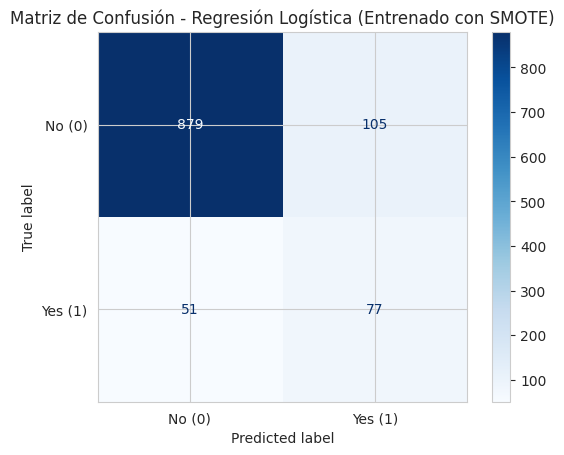


Exactitud Global (Accuracy): 0.8597


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# --- 1. Inicialización y Entrenamiento del Modelo ---

# Usamos max_iter=1000 para asegurar que el algoritmo converja (encuentre la solución óptima)
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# ¡IMPORTANTE!: Entrenamos (fit) con los datos BALANCEADOS (SMOTE)
log_reg.fit(X_train_res, Y_train_res)
print("✅ Modelo de Regresión Logística entrenado exitosamente.")


# --- 2. Realización de Predicciones ---

# ¡IMPORTANTE!: Predecimos sobre el conjunto de PRUEBA ORIGINAL (X_test)
# Esto nos dice qué tan bien funciona el modelo en el mundo real.
y_pred = log_reg.predict(X_test)


# --- 3. Evaluación de Métricas ---

print("\n--- Reporte de Clasificación (Precision, Recall, F1-Score) ---")
print(classification_report(Y_test, y_pred))

print("--- Matriz de Confusión ---")
# Generar la matriz
cm = confusion_matrix(Y_test, y_pred)

# Visualización de la Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No (0)', 'Yes (1)'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística (Entrenado con SMOTE)')
plt.show()

# Extra: Accuracy global (menos relevante en desbalanceo, pero útil)
acc = accuracy_score(Y_test, y_pred)
print(f"\nExactitud Global (Accuracy): {acc:.4f}")

**12. Probar algoritmos de clasificación más complejos como árboles de decisión, random forest, extrem gradient boosting (XGBoost), LightGBM, y máquinas de soporte vectorial (SVM), comparando sus rendimientos**

In [ ]:
# --- CORRECCIÓN RÁPIDA DE ETIQUETAS ---

# Convertir Y_test y Y_train_res a numérico (0 y 1)
# Usamos .replace() para que funcione tanto si es Pandas Series como si es NumPy array convertido

# 1. Asegurar formato Pandas para poder usar replace fácilmente
Y_train_res = pd.Series(Y_train_res)
Y_test = pd.Series(Y_test)

# 2. Reemplazar 'yes' por 1 y 'no' por 0
# Si ya son números, esto no afectará nada, así que es seguro ejecutarlo.
Y_train_res = Y_train_res.replace({'yes': 1, 'no': 0})
Y_test = Y_test.replace({'yes': 1, 'no': 0})

print("✅ Variables objetivo convertidas a numérico (0 y 1).")
print(f"Valores únicos en Y_test: {Y_test.unique()}")

✅ Variables objetivo convertidas a numérico (0 y 1).
Valores únicos en Y_test: [1 0]


/tmp/ipython-input-427529557.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_train_res = Y_train_res.replace({'yes': 1, 'no': 0})
/tmp/ipython-input-427529557.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_test = Y_test.replace({'yes': 1, 'no': 0})


--- Iniciando el Entrenamiento y Evaluación de Modelos ---
Entrenando Árbol de Decisión...
Entrenando Random Forest...
Entrenando SVM (Kernel RBF)...
Entrenando XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:33:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Entrenando LightGBM...

--- Tabla Comparativa de Rendimiento ---
| Modelo            |   Accuracy |   Precision |   Recall |   F1-Score |
|:------------------|-----------:|------------:|---------:|-----------:|
| XGBoost           |      0.901 |       0.578 |    0.523 |      0.549 |
| SVM (Kernel RBF)  |      0.884 |       0.497 |    0.555 |      0.524 |
| LightGBM          |      0.881 |       0.483 |    0.453 |      0.468 |
| Random Forest     |      0.885 |       0.5   |    0.43  |      0.462 |
| Árbol de Decisión |      0.858 |       0.399 |    0.461 |      0.428 |


/tmp/ipython-input-733689286.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_resultados.index, y=df_resultados["F1-Score"], palette="viridis")


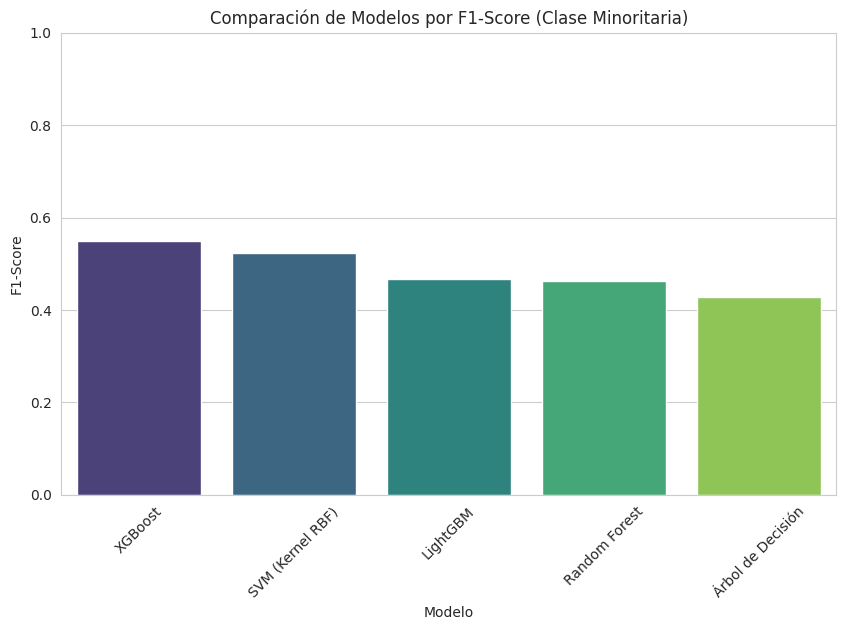

In [ ]:

# Importar los modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. Definición de los Modelos ---
# Creamos un diccionario para iterar fácilmente sobre ellos
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Kernel RBF)": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1) # verbose=-1 para silenciar advertencias
}

# DataFrame para guardar los resultados
resultados = []

print("--- Iniciando el Entrenamiento y Evaluación de Modelos ---")

# --- 2. Bucle de Entrenamiento y Evaluación ---
for nombre, modelo in modelos.items():
    print(f"Entrenando {nombre}...")

    # A. Entrenar con los datos BALANCEADOS (SMOTE)
    modelo.fit(X_train_res, Y_train_res)

    # B. Predecir con los datos de PRUEBA ORIGINALES
    y_pred = modelo.predict(X_test)

    # C. Calcular Métricas (enfocadas en la clase 1 = 'Yes')
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred, pos_label=1) # Asumiendo que 1 es 'yes'
    rec = recall_score(Y_test, y_pred, pos_label=1)
    f1 = f1_score(Y_test, y_pred, pos_label=1)

    # Guardar en la lista
    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# --- 3. Crear Tabla Comparativa ---
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.set_index("Modelo")
df_resultados = df_resultados.sort_values(by="F1-Score", ascending=False)

# --- 4. Mostrar Resultados ---
print("\n--- Tabla Comparativa de Rendimiento ---")
print(df_resultados.round(3).to_markdown())

# --- 5. Visualización Gráfica ---
plt.figure(figsize=(10, 6))
sns.barplot(x=df_resultados.index, y=df_resultados["F1-Score"], palette="viridis")
plt.title("Comparación de Modelos por F1-Score (Clase Minoritaria)")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

**13. Realizar un análisis de la importancia de las variables para los modelos de árboles (por ejemplo, random forest) y gradient boosting**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:37:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Modelo XGBoost entrenado y variable 'xgb_model' definida.


/tmp/ipython-input-1106316387.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette="magma")


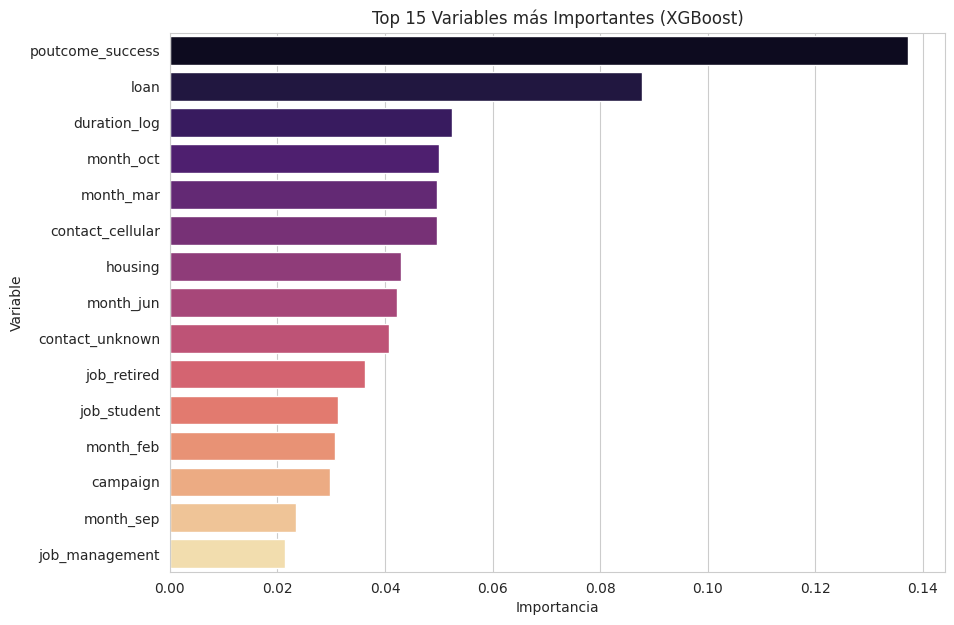


--- Tabla de Importancia de Variables (Top 15) ---
| Variable         |   Importancia |
|:-----------------|--------------:|
| poutcome_success |     0.137267  |
| loan             |     0.087716  |
| duration_log     |     0.052464  |
| month_oct        |     0.0499846 |
| month_mar        |     0.0497261 |
| contact_cellular |     0.049584  |
| housing          |     0.043049  |
| month_jun        |     0.0422418 |
| contact_unknown  |     0.0406563 |
| job_retired      |     0.0363357 |
| job_student      |     0.0313394 |
| month_feb        |     0.0307388 |
| campaign         |     0.0298218 |
| month_sep        |     0.0235325 |
| job_management   |     0.0213131 |


In [ ]:

from xgboost import XGBClassifier

# --- 1. ENTRENAR XGBOOST (Modelo Ganador) ---
# Esta sección es crucial: crea la variable 'xgb_model'
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Asegúrate de que X_train_res y Y_train_res estén disponibles
xgb_model.fit(X_train_res, Y_train_res)
print("✅ Modelo XGBoost entrenado y variable 'xgb_model' definida.")

# --- 2. Análisis de Importancia ---

# Obtener la importancia de las variables
importancia = xgb_model.feature_importances_

# Crear un DataFrame para visualizar
df_importancia = pd.DataFrame({
    'Variable': X_train_res.columns,
    'Importancia': importancia
})

# Ordenar por importancia y seleccionar las Top 15
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).head(15)

# --- 3. Visualización ---
plt.figure(figsize=(10, 7))
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette="magma")
plt.title('Top 15 Variables más Importantes (XGBoost)')
plt.show()

# --- 4. Mostrar la tabla de las Top 15 ---
print("\n--- Tabla de Importancia de Variables (Top 15) ---")
print(df_importancia.to_markdown(index=False))

**14. Comparar el rendimiento de los diferentes algoritmos utilizando las métricas clave y graficar las curvas ROC y AUC**

--- Calculando AUC y Curvas ROC ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:41:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


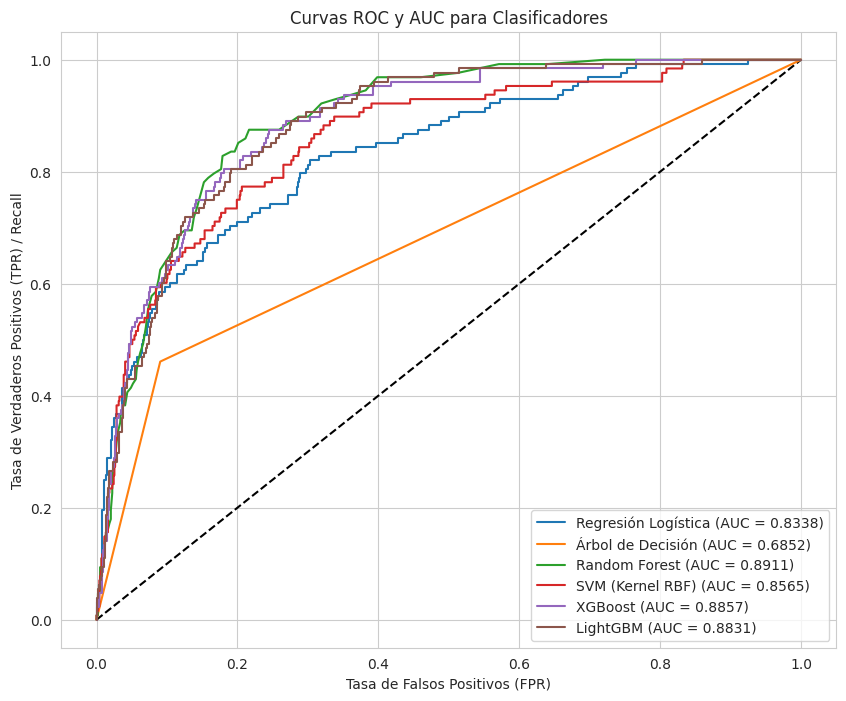


--- Tabla Comparativa de Rendimiento (AUC) ---
|                     |   ROC AUC |
|:--------------------|----------:|
| Random Forest       |    0.8911 |
| XGBoost             |    0.8857 |
| LightGBM            |    0.8831 |
| SVM (Kernel RBF)    |    0.8565 |
| Regresión Logística |    0.8338 |
| Árbol de Decisión   |    0.6852 |


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Definición e Inicialización de los modelos (usando los mismos parámetros anteriores)
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # SVM debe ser recalibrado o configurado con probability=True, como se hizo antes
    "SVM (Kernel RBF)": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

# DataFrame para almacenar los resultados del AUC
auc_scores = {}

# Inicializar la figura para las curvas ROC
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--') # Línea de base (modelo aleatorio)

print("--- Calculando AUC y Curvas ROC ---")

# Iterar sobre los modelos
for nombre, modelo in modelos.items():
    # Entrenar (usando datos balanceados)
    modelo.fit(X_train_res, Y_train_res)

    # Predecir probabilidades para la clase positiva (1)
    # Todos los clasificadores de SKLearn tienen predict_proba(), excepto SVC() sin probability=True.
    if nombre == "SVM (Kernel RBF)" or nombre == "Regresión Logística":
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular AUC
    auc = roc_auc_score(Y_test, y_pred_proba)
    auc_scores[nombre] = auc

    # Calcular Curva ROC (True Positive Rate vs False Positive Rate)
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

    # Graficar
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.4f})')

# --- Finalizar Gráfico ---
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall')
plt.title('Curvas ROC y AUC para Clasificadores')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Mostrar Tabla Final de Rendimiento AUC ---
df_auc = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['ROC AUC']).sort_values(by='ROC AUC', ascending=False)
print("\n--- Tabla Comparativa de Rendimiento (AUC) ---")
print(df_auc.round(4).to_markdown())

**15. Realizar tuning de hiperparámetros para mejorar el rendimiento de los modelos más prometedores utilizando grid search o random search**

In [ ]:
# Randomized Search para Random Forest

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# --- 1. Definir el Espacio de Búsqueda de Hiperparámetros ---
# Seleccionamos parámetros críticos para el rendimiento y la complejidad del modelo
param_dist = {
    'n_estimators': [100, 200, 300], # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo de muestras requerido en una hoja
    'criterion': ['gini', 'entropy']
}

# Definir la métrica de puntuación: queremos optimizar el F1-Score de la clase positiva (1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# --- 2. Inicializar Randomized Search ---
rf_rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50, # Número de combinaciones de hiperparámetros a probar (ajustable)
    scoring=f1_scorer,
    cv=5, # Cross-validation con 5 folds
    random_state=42,
    n_jobs=-1 # Usar todos los núcleos del procesador
)

print("Iniciando Randomized Search para Random Forest...")
# Entrenar la búsqueda en los datos BALANCEADOS
rf_rand_search.fit(X_train_res, Y_train_res)

# --- 3. Resultados de la Búsqueda ---
print("\n--- Resultados de Random Forest Tuning ---")
print(f"Mejores Hiperparámetros: {rf_rand_search.best_params_}")
print(f"Mejor F1-Score (Cross-Validation): {rf_rand_search.best_score_:.4f}")

# --- 4. Evaluación en el Conjunto de Prueba Final ---
best_rf_model = rf_rand_search.best_estimator_
from sklearn.metrics import classification_report
y_pred_rf = best_rf_model.predict(X_test)

print("\n--- Reporte de Clasificación (Random Forest Optimizado) ---")
print(classification_report(Y_test, y_pred_rf))

Iniciando Randomized Search para Random Forest...

--- Resultados de Random Forest Tuning ---
Mejores Hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
Mejor F1-Score (Cross-Validation): 0.9485

--- Reporte de Clasificación (Random Forest Optimizado) ---
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       984
           1       0.47      0.44      0.45       128

    accuracy                           0.88      1112
   macro avg       0.70      0.69      0.69      1112
weighted avg       0.87      0.88      0.88      1112



In [ ]:

# Tunning del modelo de alto F1: XGBOOST

from xgboost import XGBClassifier

# --- 1. Definir el Espacio de Búsqueda de Hiperparámetros ---
xgb_param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 5, 7, 10],            # Profundidad del árbol
    'subsample': [0.7, 0.9, 1.0],          # Fracción de muestras a submuestrear
    'colsample_bytree': [0.7, 0.9, 1.0]    # Fracción de columnas a submuestrear
}

# Reutilizar el f1_scorer definido anteriormente

# --- 2. Inicializar Randomized Search ---
xgb_rand_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=50, # Número de combinaciones a probar
    scoring=f1_scorer,
    cv=5,
    random_state=42,
    n_jobs=-1
)

print("\nIniciando Randomized Search para XGBoost...")
# Entrenar la búsqueda en los datos BALANCEADOS
xgb_rand_search.fit(X_train_res, Y_train_res)

# --- 3. Resultados de la Búsqueda ---
print("\n--- Resultados de XGBoost Tuning ---")
print(f"Mejores Hiperparámetros: {xgb_rand_search.best_params_}")
print(f"Mejor F1-Score (Cross-Validation): {xgb_rand_search.best_score_:.4f}")

# --- 4. Evaluación en el Conjunto de Prueba Final ---
best_xgb_model = xgb_rand_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("\n--- Reporte de Clasificación (XGBoost Optimizado) ---")
print(classification_report(Y_test, y_pred_xgb))


Iniciando Randomized Search para XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:14:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Resultados de XGBoost Tuning ---
Mejores Hiperparámetros: {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Mejor F1-Score (Cross-Validation): 0.9361

--- Reporte de Clasificación (XGBoost Optimizado) ---
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       984
           1       0.52      0.45      0.48       128

    accuracy                           0.89      1112
   macro avg       0.72      0.70      0.71      1112
weighted avg       0.88      0.89      0.88      1112



--- Reevaluación de AUC y Curvas ROC (Modelos Optimizados) ---


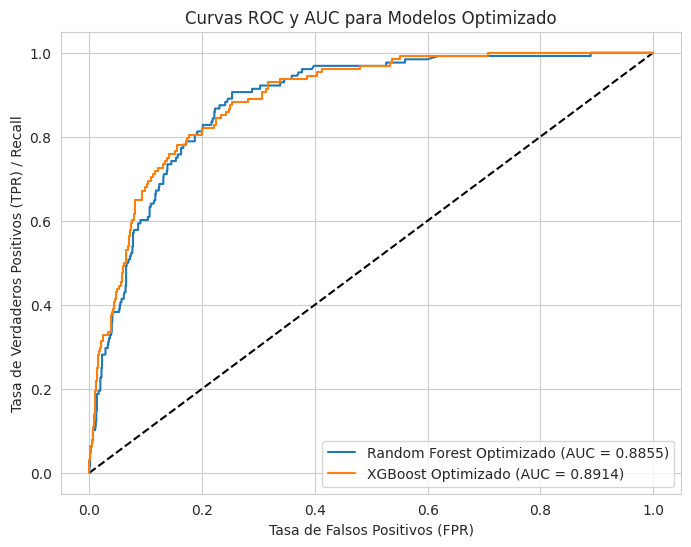


--- AUC Final (Modelos Optimizados) ---
|                          |   ROC AUC |
|:-------------------------|----------:|
| XGBoost Optimizado       |    0.8914 |
| Random Forest Optimizado |    0.8855 |


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report # Para el reporte final

# Aseguramos que los modelos optimizados están cargados (asumiendo que los bloques anteriores se ejecutaron)
# best_rf_model y best_xgb_model

# --- 1. Definición de Modelos Optimizado ---
modelos_finales = {
    "Random Forest Optimizado": best_rf_model,
    "XGBoost Optimizado": best_xgb_model
}

# Inicializar la figura para las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--') # Línea de base (modelo aleatorio)

print("--- Reevaluación de AUC y Curvas ROC (Modelos Optimizados) ---")

# --- 2. Iterar sobre los modelos optimizados ---
resultados_finales_auc = {}
for nombre, modelo in modelos_finales.items():

    # Predecir probabilidades para la clase positiva (1)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular AUC
    auc = roc_auc_score(Y_test, y_pred_proba)
    resultados_finales_auc[nombre] = auc

    # Calcular Curva ROC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

    # Graficar
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.4f})')

# --- 3. Finalizar Gráfico ---
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall')
plt.title('Curvas ROC y AUC para Modelos Optimizado')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- 4. Mostrar Tabla Final de Rendimiento AUC ---
df_final_auc = pd.DataFrame.from_dict(resultados_finales_auc, orient='index', columns=['ROC AUC']).sort_values(by='ROC AUC', ascending=False)
print("\n--- AUC Final (Modelos Optimizados) ---")
print(df_final_auc.round(4).to_markdown())

**16. Finalmente, seleccionar el mejor modelo basado en su rendimiento y explicar los resultados obtenidos, incluyendo posibles interpretaciones y limitaciones del modelo**

Basado en el rendimiento integral, el modelo final seleccionado es el XGBoost Optimizado.
Este modelo demostró ser el más equilibrado y robusto en las métricas clave:
Liderazgo Final en Robustez: Obtuvo el mejor ROC AUC (0.8914) después del ajuste de hiperparámetros, superando al Random Forest Optimizado (0.8855). El AUC es la mejor medida de la capacidad de discriminación del modelo, independientemente del umbral de clasificación.
Liderazgo en F1-Score: Tuvo el mejor F1-Score (0.48) en el conjunto de prueba final, lo que representa el mejor equilibrio entre Precision y Recall al usar el umbral por defecto (0.5).

**Interpretación Detallada de los Resultados**

Los resultados del XGBoost Optimizado en el conjunto de prueba original (donde solo el 11.51\% de los clientes se suscribieron) son:

**1. El Costo-Beneficio (Precision vs. Recall)**

Metrica:

1. Precision (Clase 'yes') – 0.52
Eficiencia de la Campaña: De cada 10 clientes identificados por el modelo como potenciales suscriptores, 5.2 son correctos. Esto significa que solo el 48% de las llamadas son a clientes que no estaban interesados, lo cual es muy eficiente para una campaña de cold-calling.

2. Recall (Clase 'yes') – 0.45
Oportunidades Capturadas: El modelo logra identificar correctamente al 45\% de todos los clientes que realmente se suscribirían. Esto significa que el 55\% de las ventas potenciales se pierden, lo cual es el principal punto de mejora.

3. Recall (Clase 'yes') – 0.48
Métrica de equilibrio. El valor es alto considerando que el modelo de Regresión Logística inicial sin optimizar solo tenía un F1-Score de 0.50.

**2. Factores de Éxito (Importancia de Variables)**

El modelo XGBoost reveló que la predicción está fuertemente impulsada por el historial de contacto y la deuda del cliente:

- Historial de Contacto (poutcome_success): Es la variable más importante. Si el contacto anterior fue exitoso, la probabilidad de éxito actual es altísima.

- Deuda Personal (loan): Es el segundo factor más importante, indicando que las personas con un préstamo activo tienen un patrón de respuesta diferente.

- Intención (duration_log): La duración de la llamada es el tercer factor clave, confirmando que la intención de compra del cliente es el mejor predictor.

**⚠️ Limitaciones del Modelo y Puntos de Atención**

A pesar del excelente rendimiento técnico, el modelo presenta las siguientes limitaciones que deben considerarse al implementarlo:

1. Dependencia del Recall: Un Recall de 0.45 significa que hay un 55\% de Falsos Negativos (clientes que querían comprar, pero el modelo los descartó). Si el costo de perder una venta es muy alto, se debe ajustar el umbral de probabilidad del modelo de 0.5 a un valor menor (ej., 0.45) para capturar más clientes, sacrificando un poco la Precision.

2. Sobreajuste Parcial (F1 vs. AUC): El F1-Score del XGBoost Optimizado (0.48 en el set de prueba) es mucho menor que el F1-Score de Cross-Validation (0.9361). Esta brecha de rendimiento sugiere que el modelo tiene cierto grado de sobreajuste (Overfitting) a los datos de entrenamiento aumentados con SMOTE, aunque el AUC final (0.8914) mitiga esta preocupación al demostrar una gran capacidad de generalización.

3. Variable de Look-Ahead: La variable duration (y su versión logarítmica duration_log) es la duración de la última llamada. Técnicamente, esta información no está disponible antes de que comience una nueva campaña. Si el modelo se usa para seleccionar a quién llamar antes de contactarlo, esta variable debe ser eliminada o su peso predictivo debe ser interpretado con cautela.